In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from spice_net import *

In [12]:
# Generate the uniform dataset 
num_pts = 10
lh = 1.25
eval_set = np.array(np.meshgrid(np.arange(-lh, lh, 2*lh/num_pts), np.arange(-lh, lh, 2*lh/num_pts))).reshape(2,-1).T 
eval_bias = np.hstack((eval_set, np.ones((eval_set.shape[0], 1))))
N = eval_bias.shape[0]
nodes = 20

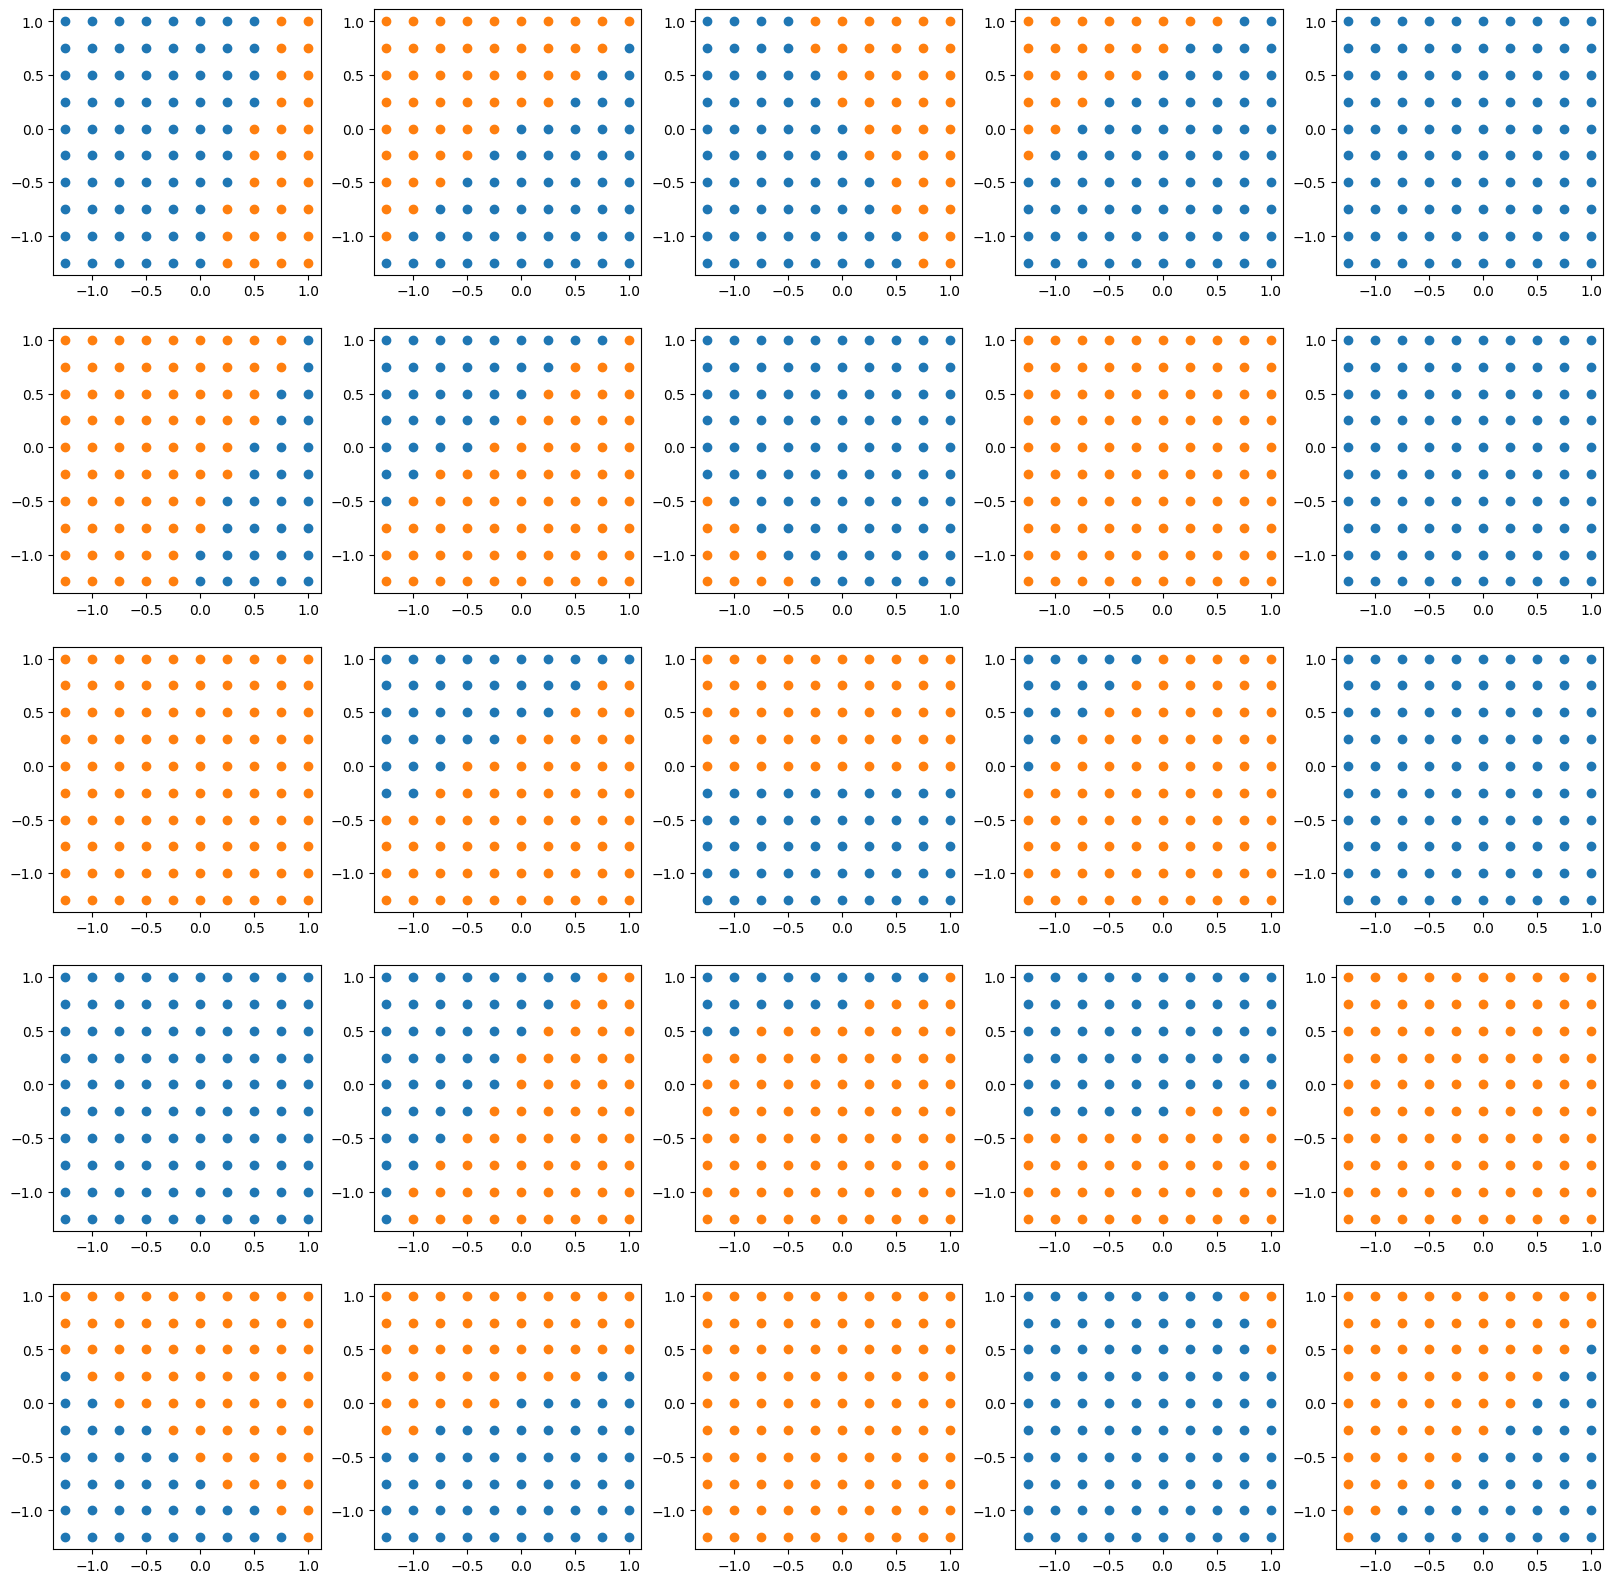

In [13]:
# Generate a ton of randomly initialized networks and see how they do
con_thresh=1.0
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig
out_nodes = 2
bias = True
if bias:
    dset = eval_bias
else:
    dset = eval_set

in_nodes = dset.shape[1]
nets = []

for row in axs:
    for subp in row:
        tmp = np.random.rand(nodes, nodes)
        con_mask = (np.random.rand(nodes, nodes) < con_thresh)
        con_mask = con_mask * con_mask.T
        rand_cfg = np.concatenate(([0], np.random.permutation([1]*in_nodes + [-1]*out_nodes + [0]*(nodes-in_nodes-out_nodes-1))))

        rand_net = LinearNetwork('rand2', (tmp + tmp.T) * con_mask / 2, rand_cfg)
        nets.append([(tmp + tmp.T) * con_mask / 2, rand_cfg])

        res = np.empty((N, out_nodes))

        for i in range(N):
            res[i] = rand_net.solve(dset[i])[rand_cfg < 0]

        subp.scatter(*eval_set[res.T[0] < res.T[1]].T)
        subp.scatter(*eval_set[res.T[0] > res.T[1]].T)
        subp.scatter(*eval_set[res.T[0] == res.T[1]].T)

In [5]:
sus_net = nets[3]
res = np.empty((N, out_nodes))
for i in range(N):
    res[i] = sus_net.solve(eval_bias[i])[rand_cfg < 0]

plt.scatter(*eval_set[res.T[0] < res.T[1]].T)
plt.scatter(*eval_set[res.T[0] > res.T[1]].T)
plt.scatter(*eval_set[res.T[0] == res.T[1]].T)

AttributeError: 'list' object has no attribute 'solve'